In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Glos')
folder = os.path.join('/content/drive/My Drive/Colab Notebooks/Glos')
!ls

Mounted at /content/drive
 ANN.ipynb	        heart.csv	   Seed_Data.csv
 breast-cancer.data     heartdata.csv	   Social_Network_Ads.csv
 Churn_Modelling.csv    IMDBDataset.csv    SVMDTr.ipynb
 classification.ipynb   Live.csv	   Untitled0.ipynb
 clustering.ipynb       LogisticNB.ipynb  'Wholesale customers data.csv'
 CNN.ipynb	        malldata.csv	   Wine.csv
 diabetes.csv	        nlplab.ipynb


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
#Laod mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#create validation set
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

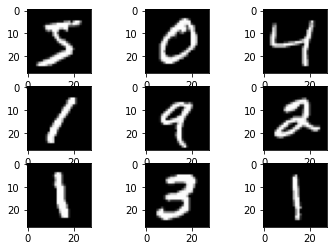

In [5]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(60000, 28, 28)
(5000, 28, 28)
(5000, 28, 28)


In [7]:
#reshaping data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1)) 
x_val = x_val.reshape((x_val.shape[0],x_val.shape[1],x_val.shape[2],1))

In [8]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 28, 28, 1)


In [9]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

In [10]:
# normalize to range 0-1
x_train /= 255.0
x_test /= 255.0
x_val /= 255.0

In [11]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))


In [14]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:
#fitting the model
historycnn = model.fit(x_train,y_train,epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1594 - accuracy: 0.9522 - val_loss: 0.0699 - val_accuracy: 0.9786
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0483 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0622 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0513 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0519 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0649 -

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.05029255151748657
accuracy= 0.9872000217437744


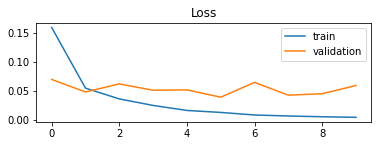

In [18]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(historycnn.history['loss'], label='train')
pyplot.plot(historycnn.history['val_loss'], label='validation')
pyplot.legend()

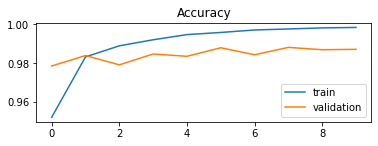

In [19]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(historycnn.history['accuracy'], label='train')
pyplot.plot(historycnn.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()